In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_total = pd.read_csv("coverage.csv")

In [3]:
df_total

,Unnamed: 0,default,svgd,svmd,target
0,1,0,0,0,0.50
1,2,0,0,1,0.50
2,3,1,1,1,0.50
3,4,1,0,1,0.50
4,5,0,1,0,0.50
...,...,...,...,...,...
1123,1124,0,0,0,0.99
1124,1125,1,1,1,0.99
1125,1126,1,1,1,0.99
1126,1127,1,1,1,0.99


In [4]:
df_total[df_total.target == 0.5]

,Unnamed: 0,default,svgd,svmd,target
0,1,0,0,0,0.5
1,2,0,0,1,0.5
2,3,1,1,1,0.5
3,4,1,0,1,0.5
4,5,0,1,0,0.5
...,...,...,...,...,...
164,165,0,1,0,0.5
165,166,1,1,1,0.5
166,167,1,1,1,0.5
167,168,0,1,1,0.5


In [5]:
df_avg = df_total[["default", "svgd", "svmd", "target"]].groupby("target", as_index=False).agg("mean")
df_avg

,target,default,svgd,svmd
0,0.50,0.550296,0.591716,0.497041
1,0.60,0.666667,0.654321,0.549383
2,0.70,0.768212,0.794702,0.708609
3,0.80,0.791139,0.860759,0.708861
4,0.90,0.856287,0.898204,0.844311
5,0.95,0.923077,0.928571,0.873626
6,0.99,0.978417,0.971223,0.913669


In [6]:
df_melt = pd.melt(df_total, id_vars=["target"], value_vars=["default", "svgd", "svmd"], var_name='method', value_name='covered')
df_melt

,target,method,covered
0,0.50,default,0
1,0.50,default,0
2,0.50,default,1
3,0.50,default,1
4,0.50,default,0
...,...,...,...
3379,0.99,svmd,0
3380,0.99,svmd,1
3381,0.99,svmd,1
3382,0.99,svmd,1


In [7]:
target_coverages = sorted(set(df_total["target"].values))
methods = list(set(df_melt["method"].values))

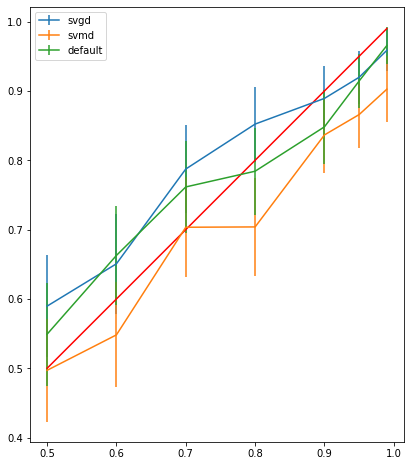

In [8]:
def ci(df_total, method, z=1.96):
    means = []
    errs = []
    for target in target_coverages:
        covered = df_total.loc[df_total["target"] == target, method].values
        ns = covered.sum()
        n = covered.shape[0]
        means.append((ns + 0.5 * z**2) / (n + z**2))
        errs.append(z / (n + z**2) * np.sqrt(ns * (n - ns) / n + z**2 / 4.))
    return means, errs

plt.figure(figsize=(8, 8))
# sns.lineplot(data=df_melt, x="target", y="covered", hue="method", ci=95, err_style='bars')
for method in methods:
    # if method == "default":
    means, errors = ci(df_total, method)
    plt.errorbar(df_avg.target, means, yerr=errors, label=method)
plt.plot(target_coverages, target_coverages, c="r")
plt.axis('scaled')
plt.legend()